<a href="https://colab.research.google.com/github/dibend/Colab/blob/main/Option_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enter a list of tickers seperated by commas with no spaces:
NVDA


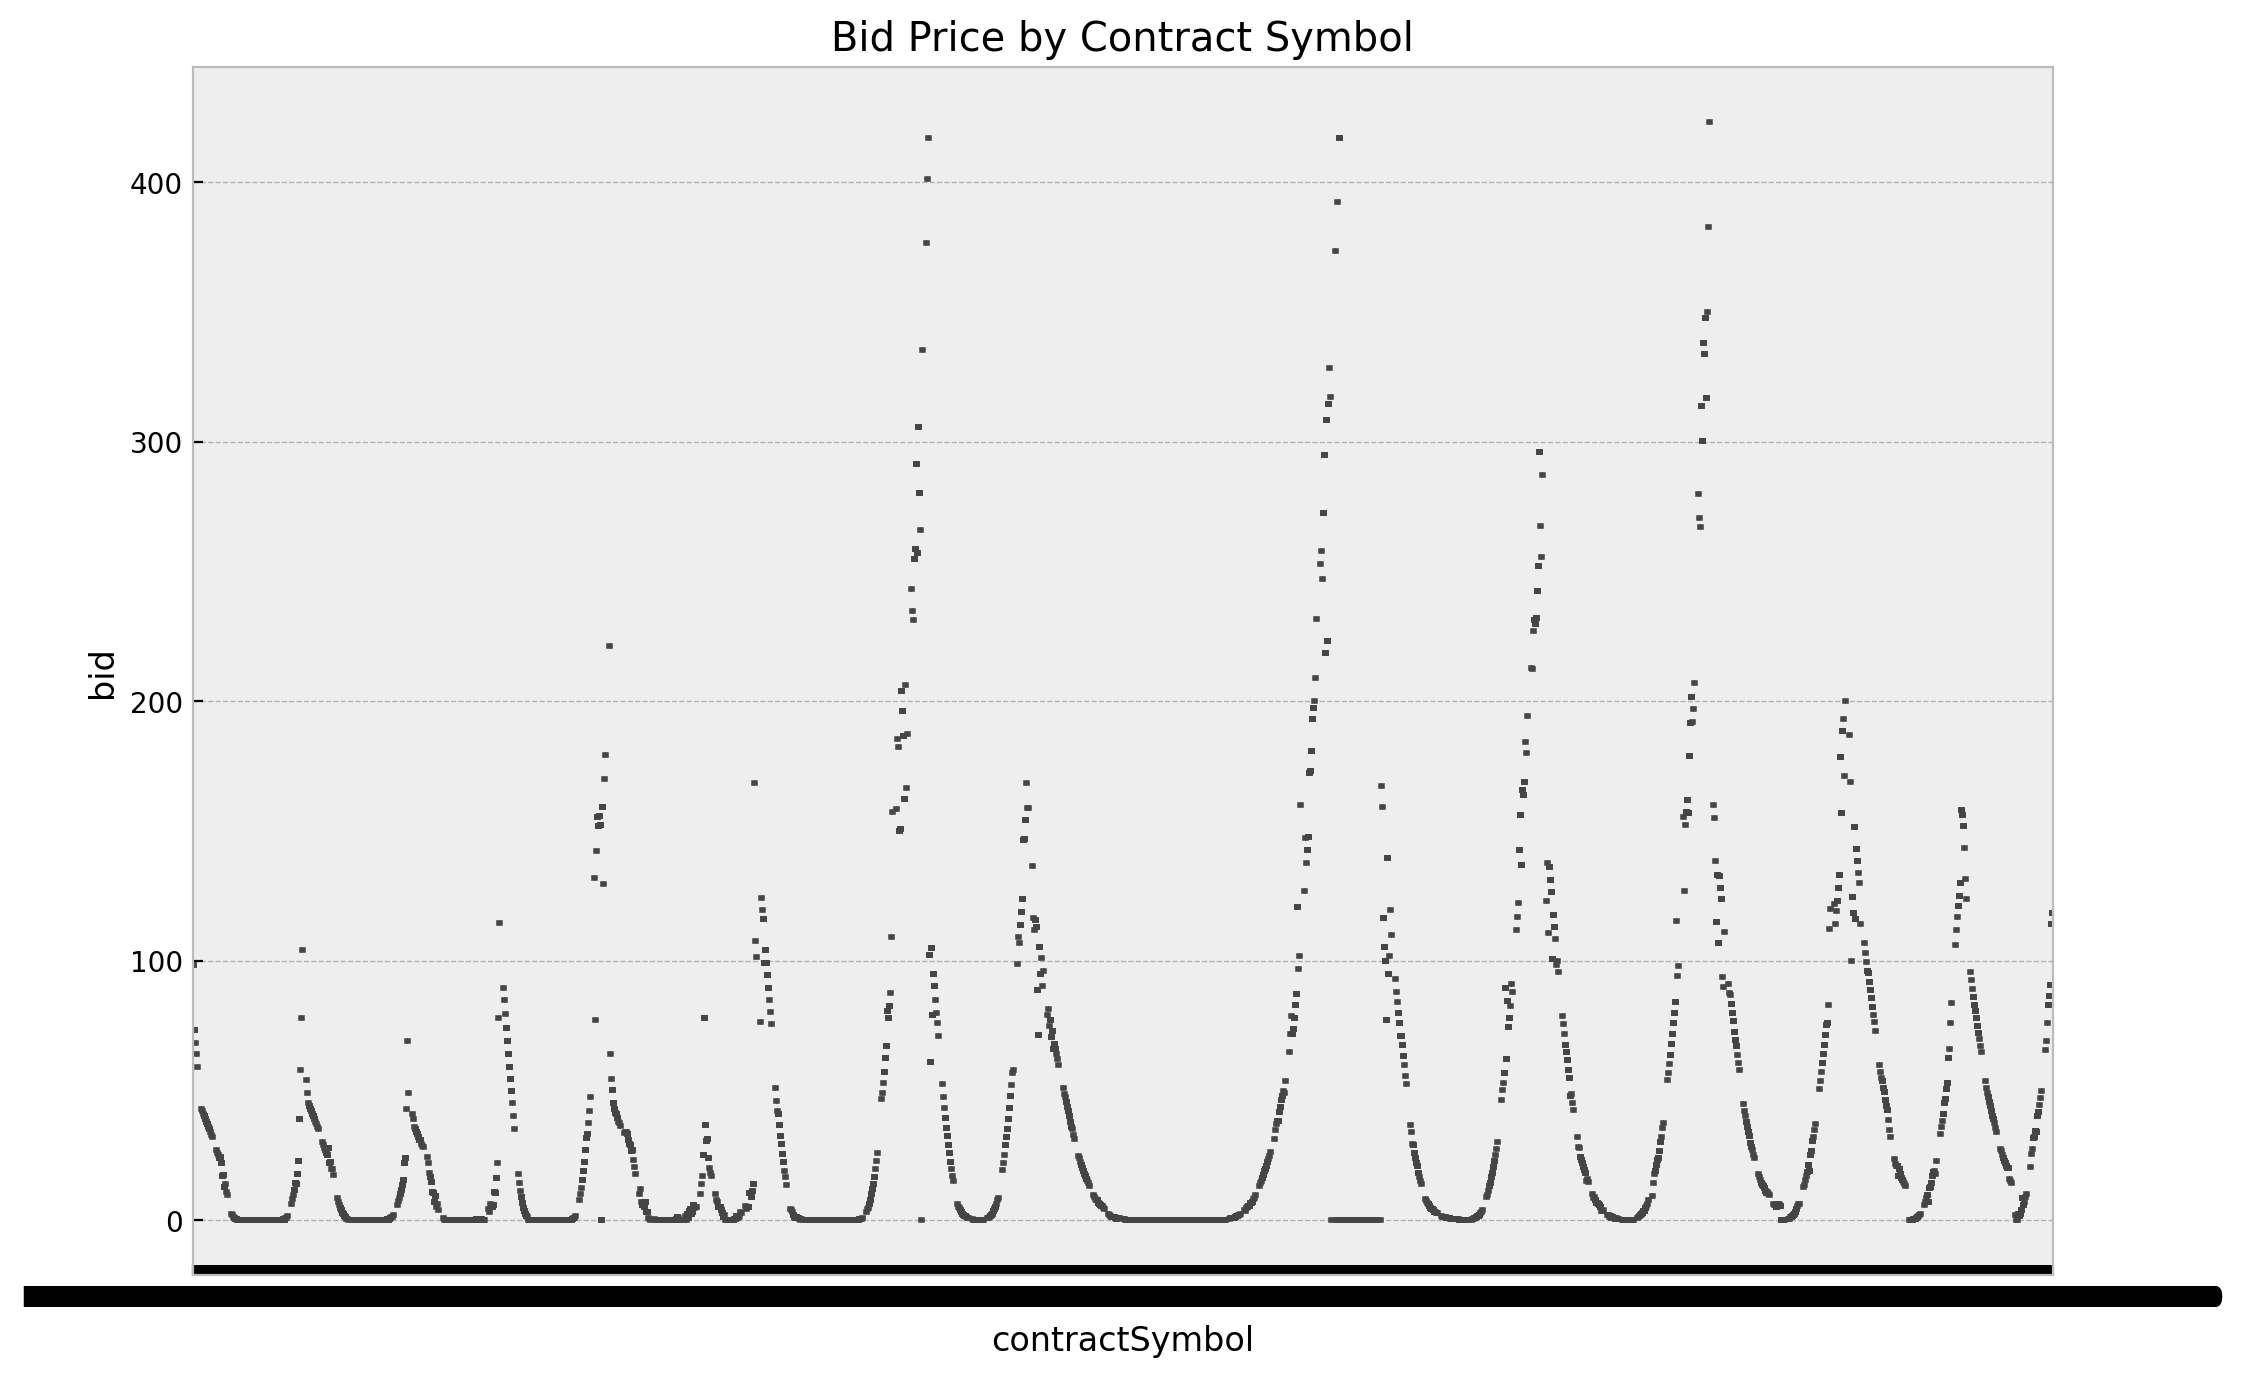

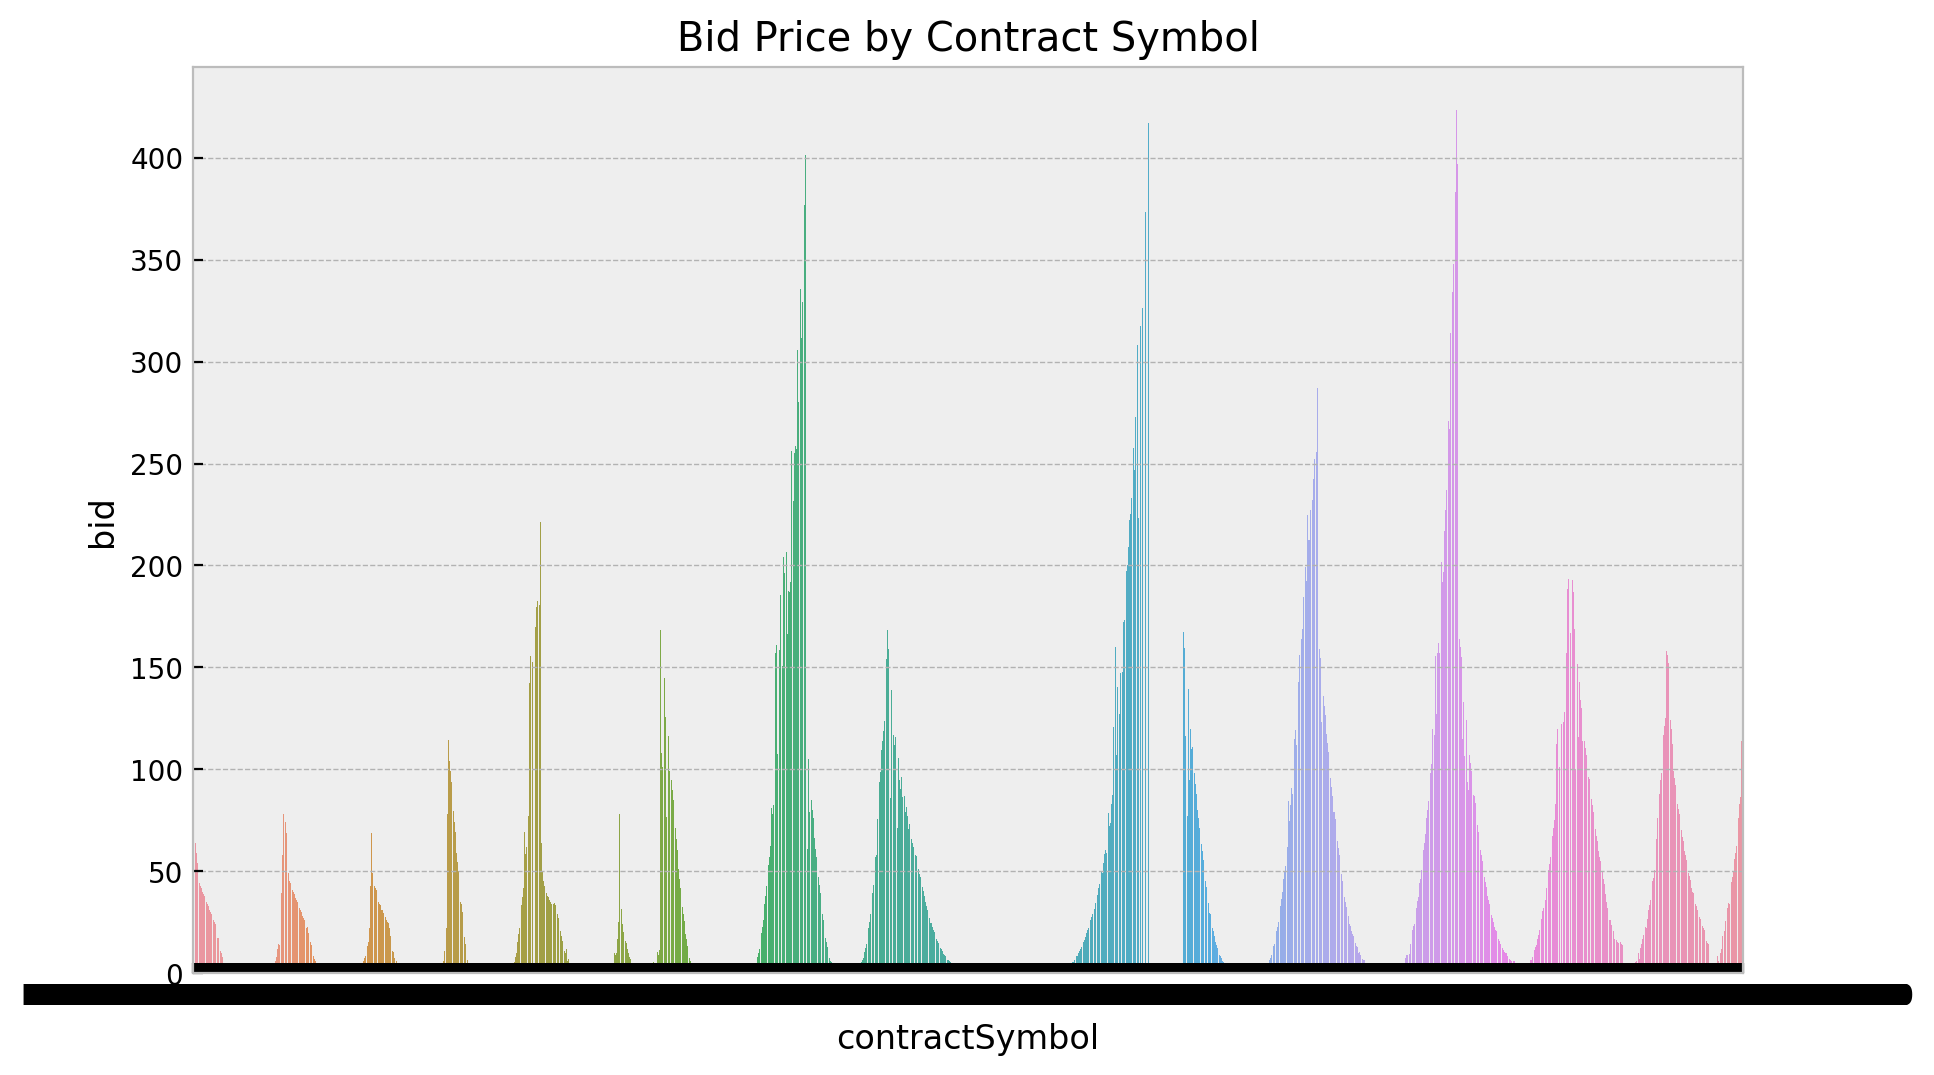

In [6]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import data_table

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

data_table.enable_dataframe_formatter()

yf.pdr_override()

stocklist = input('Enter a list of tickers seperated by commas with no spaces:\n').split(',')
optionsX = pd.DataFrame()

for x in stocklist:
    tk = yf.Ticker(x)  
    exps = tk.options  #expiration dates
    try:
        for e in exps:
            opt = tk.option_chain(e)
            opt = pd.DataFrame().append(opt.calls).append(opt.puts)
            opt['expirationDate'] = e
            opt['Symbol'] = x
            optionsX = optionsX.append(opt, ignore_index=True)
    except:
        pass
optionsX